In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
datapath = '../../../data/tv-color/red-black-2Hz/'
recData = np.load(os.path.join(datapath, 'recording.npy'))
cfg = np.load(os.path.join(datapath, './config.npy'), allow_pickle=True).item()

In [3]:
nfft = cfg['nfft']
dist_vec = cfg['dist_vec']

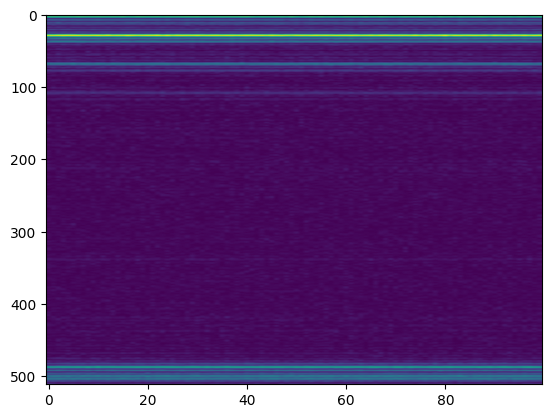

In [4]:
rp = np.fft.ifft(recData[:, 0, :], axis=1, n=nfft) # frames, range bins

plt.imshow(np.abs(rp.T), aspect='auto')

In [5]:
nfft_doppler = 256
rd = np.fft.fft(rp, axis=0, n=nfft_doppler) # doppler, range bins

Text(0.5, 1.0, 'Range doppler')

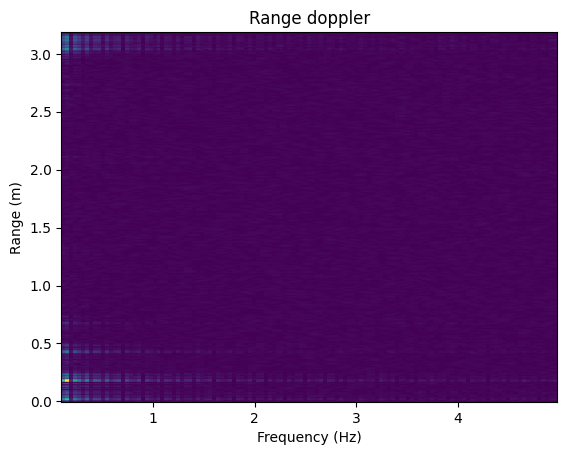

In [6]:
freq_vec = np.arange(nfft_doppler) * 10 / nfft_doppler
plt.pcolormesh(freq_vec[3:nfft_doppler//2], dist_vec, np.abs(rd[3:nfft_doppler//2, :].T))
plt.ylabel("Range (m)")
plt.xlabel("Frequency (Hz)")
plt.title("Range doppler")

In [7]:
tv_bin = np.argmax(np.sum(np.abs(rp), axis=0)[:nfft//2], axis=0)
tv_bin

29

Text(0.5, 1.0, 'Range doppler at screen range bin')

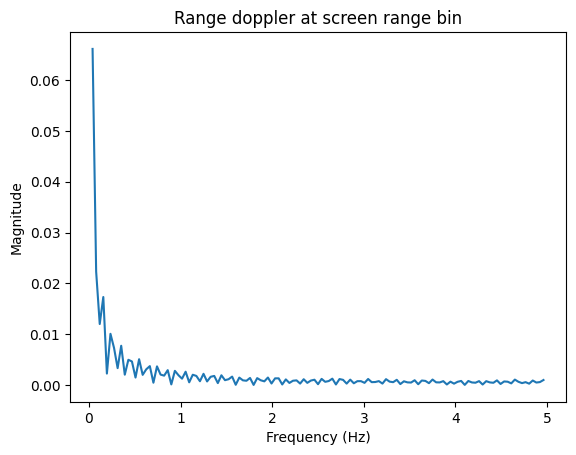

In [11]:
plt.plot(freq_vec[1:nfft_doppler//2], np.abs(rd[1:nfft_doppler//2, tv_bin]))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Range doppler at screen range bin")

Text(0.5, 0, 'Frames * Tx')

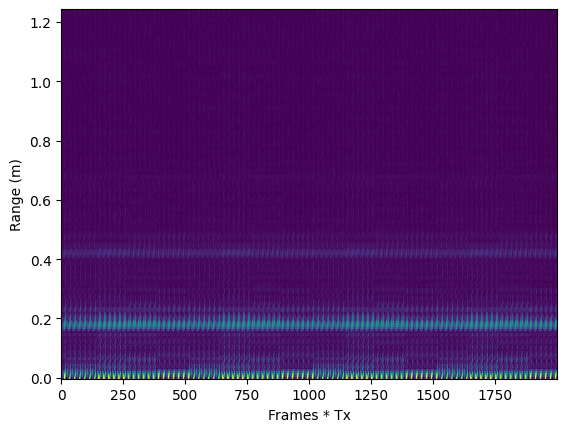

In [19]:
txData = np.reshape(recData, (recData.shape[0] * 20, 20, recData.shape[2]))
txData = txData[:, 0, :] # frames * tx, steps
rp_tx = np.fft.ifft(txData, axis=1, n=nfft) # frames, range bins
plt.pcolormesh(np.arange(2000), dist_vec[:200], np.abs(rp_tx[:, :200].T))
plt.ylabel("Range (m)")
plt.xlabel("Frames * Tx")

Text(0.5, 0, 'Frequency (Hz)')

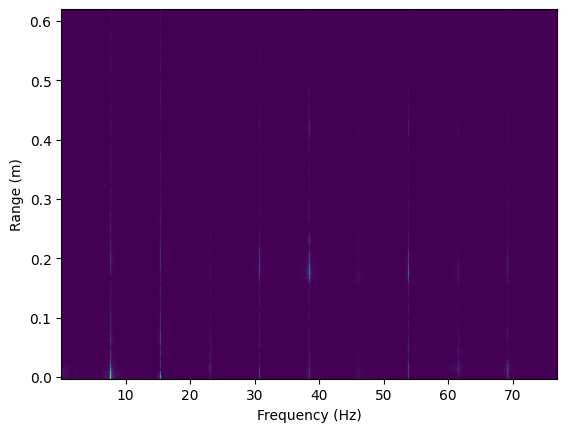

In [25]:
nfft_tx_doppler = 4096
rd_tx = np.fft.fft(rp_tx, axis=0, n=nfft_tx_doppler) # doppler, range bins
fs_tx = 1 / (0.13 / 20)
freq_tx_vec = np.arange(nfft_tx_doppler) * fs_tx / nfft_tx_doppler
plt.pcolormesh(freq_tx_vec[1:nfft_tx_doppler//2], dist_vec[:100], np.abs(rd_tx[1:nfft_tx_doppler//2, :100].T))
plt.ylabel("Range (m)")
plt.xlabel("Frequency (Hz)")

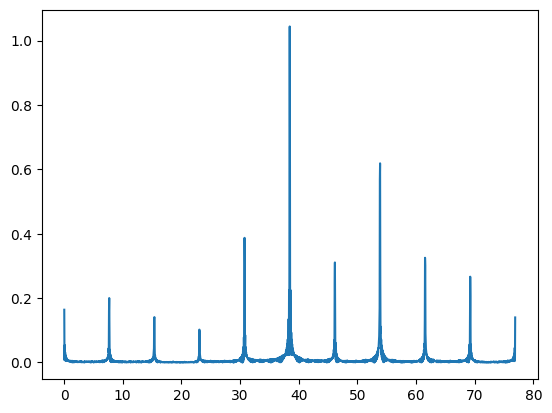

In [26]:
plt.plot(freq_tx_vec[1:nfft_tx_doppler//2], np.abs(rd_tx[1:nfft_tx_doppler//2, tv_bin]))